In [8]:
import os, glob
import tabula
import pandas as pd
import matplotlib.pyplot as plt


directory_path = '../Data_Downloads/'
file_list = []
file_list2 = []

for filename in os.listdir(directory_path):
    if os.path.isfile(os.path.join(directory_path, filename)):
        file_list.append(filename)
        

FileNotFoundError: [Errno 2] No such file or directory: '../Data_Downloads/'

In [ ]:
columns = ['Item','Sydney', 'Melbourne', 'Brisbane', 'Adelaide','Perth', 'Hobart', 'Darwin', 'Canberra', 'Date']
df = pd.DataFrame(columns=columns)
for file in file_list:
    date = file[6:14]
    tables = tabula.read_pdf(directory_path + file,pages=[2,3],pandas_options= {'header': None})
    for table in tables:
        table['Date']=date
        table.columns = columns
        df = pd.concat([df, table], ignore_index = True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %Y',errors='coerce')


In [ ]:
df

,Item,Sydney,Melbourne,Brisbane,Adelaide,Perth,Hobart,Darwin,Canberra,Date
0,"Milk, carton, supermarket sales (1 litre) (a)",116,135,119,127,135,126,122,115,1998-09-01
1,"Milk, powdered, full cream (750 g)",463,494,478,484,479,587,570,481,1998-09-01
2,"Cheese, processed, sliced, wrapped (500 g)",361,362,381,335,332,395,373,367,1998-09-01
3,Butter (500 g) (b),187,211,162,164,191,211,204,184,1998-09-01
4,real products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-09-01
...,...,...,...,...,...,...,...,...,...,...
1811,"Draught beer, low alcohol, public bar (285 ml ...",180,210,198,213,273,222,231,174,2002-06-01
1812,"Scotch nip, public bar (30 ml)",399,381,329,433,435,323,389,334,2002-06-01
1813,rsonal care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-06-01
1814,Toilet soap (4 x 125 g),259,288,271,294,262,324,313,268,2002-06-01


In [ ]:
milk_df = df[df['Item'].str.contains('milk', case=False) & df['Item'].str.contains('1 litre', case=False)]


In [ ]:
milk_df = milk_df.sort_values(by='Date')

In [ ]:
milk_df

,Item,Sydney,Melbourne,Brisbane,Adelaide,Perth,Hobart,Darwin,Canberra,Date
205,"Milk, carton, supermarket sales (1 litre) (a)",116,135,117,127,135,125.0,123,115,1998-03-01
1209,"Milk, carton, supermarket sales (1 litre) (a)",116,135,119,127,135,125,124,115,1998-06-01
0,"Milk, carton, supermarket sales (1 litre) (a)",116,135,119,127,135,126,122,115,1998-09-01
1346,"Milk, carton, supermarket sales (1 litre) (a)",116,135,120,132,135,125.0,122,115,1998-12-01
136,"Milk, carton, supermarket sales (1 litre)",122,139,119,136,141,130,130,115,1999-03-01
1279,"Milk, carton, supermarket sales (1 litre)",122,140,126,136,141,130,135,115,1999-06-01
69,"Milk, carton, supermarket sales (1 litre)",122,140,126,140,146,130.0,141,115,1999-09-01
1415,"Milk, carton, supermarket sales (1 litre)",129,142,130,141,146,130,142,119,1999-12-01
744,"Milk, carton, supermarket sales (1 litre)",131,146,135,142,146,134,144,120,2000-03-01
1548,"Milk, supermarket sales (1 litre)",135,150,145,143,145,135,145,123,2000-06-01


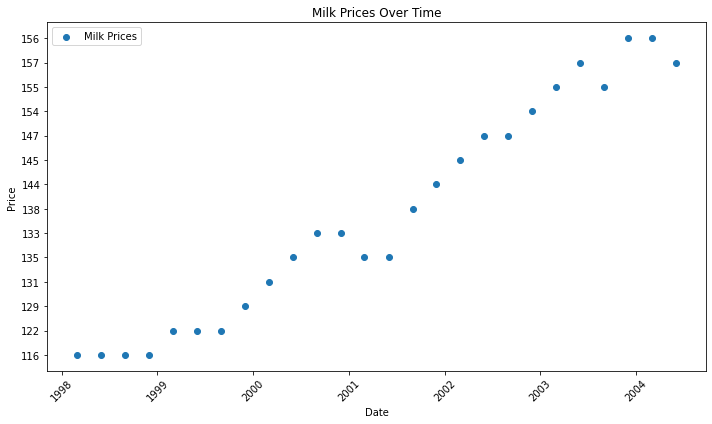

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.scatter(milk_df['Date'], milk_df['Sydney'], marker='o', linestyle='-', label='Milk Prices')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Milk Prices Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

/var/folders/qg/35fcv65d227brqg7pq_rvs_40000gn/T/ipykernel_43562/100404229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_df['month'] = egg_df['Date'].dt.month
/var/folders/qg/35fcv65d227brqg7pq_rvs_40000gn/T/ipykernel_43562/100404229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_df['year'] = egg_df['Date'].dt.year


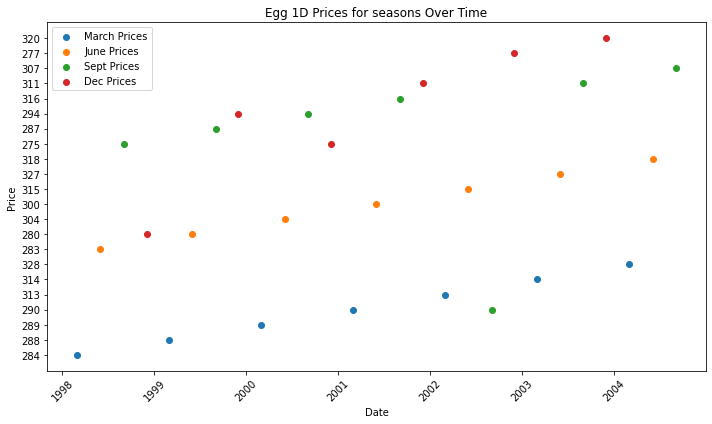

In [ ]:
egg_df = df[df['Item'].str.contains('eggs', case=False)& df['Item'].str.contains('1 dozen', case=False)]
egg_df['month'] = egg_df['Date'].dt.month
egg_df['year'] = egg_df['Date'].dt.year
egg_df = egg_df.sort_values(by='Date')
march_entries = egg_df[egg_df['month'] == 3]
june_entries = egg_df[egg_df['month'] == 6]
sept_entries = egg_df[egg_df['month'] == 9]
dec_entries = egg_df[egg_df['month'] == 12]


# Plot milk 1L prices for March entries over time
plt.figure(figsize=(10, 6))
plt.scatter(march_entries['Date'], march_entries['Sydney'], marker='o', linestyle='-', label='March Prices')
plt.scatter(june_entries['Date'], june_entries['Sydney'], marker='o', linestyle='-', label='June Prices')
plt.scatter(sept_entries['Date'], sept_entries['Sydney'], marker='o', linestyle='-', label='Sept Prices')
plt.scatter(dec_entries['Date'], dec_entries['Sydney'], marker='o', linestyle='-', label='Dec Prices')



plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Egg 1D Prices for seasons Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/qg/35fcv65d227brqg7pq_rvs_40000gn/T/ipykernel_43562/2462203660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_df['month'] = egg_df['Date'].dt.month
/var/folders/qg/35fcv65d227brqg7pq_rvs_40000gn/T/ipykernel_43562/2462203660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_df['year'] = egg_df['Date'].dt.year


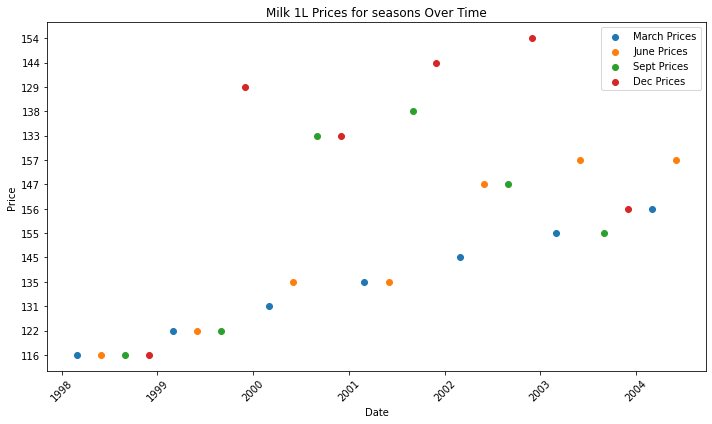

In [ ]:
egg_df = df[df['Item'].str.contains('milk', case=False)& df['Item'].str.contains('1 litre', case=False)]
egg_df['month'] = egg_df['Date'].dt.month
egg_df['year'] = egg_df['Date'].dt.year
egg_df = egg_df.sort_values(by='Date')
march_entries = egg_df[egg_df['month'] == 3]
june_entries = egg_df[egg_df['month'] == 6]
sept_entries = egg_df[egg_df['month'] == 9]
dec_entries = egg_df[egg_df['month'] == 12]


# Plot milk 1L prices for March entries over time
plt.figure(figsize=(10, 6))
plt.scatter(march_entries['Date'], march_entries['Sydney'], marker='o', linestyle='-', label='March Prices')
plt.scatter(june_entries['Date'], june_entries['Sydney'], marker='o', linestyle='-', label='June Prices')
plt.scatter(sept_entries['Date'], sept_entries['Sydney'], marker='o', linestyle='-', label='Sept Prices')
plt.scatter(dec_entries['Date'], dec_entries['Sydney'], marker='o', linestyle='-', label='Dec Prices')



plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Milk 1L Prices for seasons Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TypeError: __init__() got multiple values for argument 'schema'